#### Collecting stock market data

Data Sources:
* API
* Web Scrapers
* CSV
* Database or Warehouse
* Sensors

In this Notebook we will collect data from 
* Yahoo API
* Google Finance

After Collecting the data we will 
* Cleaning Data
* Store data using Python

##### Goal
* Goal: calc value of holdings over time
* Goal: calc & sort daily diff of holdings over time

##### Source 
- https://finance.google.com/finance?q=nasdaq:goog
- https://www.google.com/finance?q=nyse:f

In [2]:
import csv
from datetime import datetime
from dateutil.parser import parse

In [3]:
myDict = {}  # key is tuple(symbol, date) value is tuple (open, close)

stockSymbol = "goog"
fileName = "./datasets/" + stockSymbol + ".csv"

f = open(fileName, "r")

reader = csv.reader(f)
next(reader, None)  # skip the headers

#Date,Open,High,Low,Close,Volume
for data in reader:
    myDict[(stockSymbol, parse(data[0]))] = (float(data[1]),float(data[4]))

for x in myDict:
    print (x, myDict[x])
print (len(myDict))

('goog', datetime.datetime(2017, 5, 26, 0, 0)) (969.7, 971.47)
('goog', datetime.datetime(2017, 5, 25, 0, 0)) (957.33, 969.54)
('goog', datetime.datetime(2017, 5, 24, 0, 0)) (952.98, 954.96)
('goog', datetime.datetime(2017, 5, 23, 0, 0)) (947.92, 948.82)
('goog', datetime.datetime(2017, 5, 22, 0, 0)) (935.0, 941.86)
('goog', datetime.datetime(2017, 5, 19, 0, 0)) (931.47, 934.01)
('goog', datetime.datetime(2017, 5, 18, 0, 0)) (921.0, 930.24)
('goog', datetime.datetime(2017, 5, 17, 0, 0)) (935.67, 919.62)
('goog', datetime.datetime(2017, 5, 16, 0, 0)) (940.0, 943.0)
('goog', datetime.datetime(2017, 5, 15, 0, 0)) (932.95, 937.08)
('goog', datetime.datetime(2017, 5, 12, 0, 0)) (931.53, 932.22)
('goog', datetime.datetime(2017, 5, 11, 0, 0)) (925.32, 930.6)
('goog', datetime.datetime(2017, 5, 10, 0, 0)) (931.98, 928.78)
('goog', datetime.datetime(2017, 5, 9, 0, 0)) (936.95, 932.17)
('goog', datetime.datetime(2017, 5, 8, 0, 0)) (926.12, 934.3)
('goog', datetime.datetime(2017, 5, 5, 0, 0)) (93

In [5]:
## generic code to iterate through multiple stocks
myDict = {}  # key is tuple(symbol, date) value is tuple (open, close)
for x in ["goog","fb"]:
    stockSymbol = x
    fileName = "./datasets/" + stockSymbol + ".csv"
    f = open(fileName, "r")
    reader = csv.reader(f)
    next(reader, None)  # skip the headers
    #Date,Open,High,Low,Close,Volume
    for data in reader:
        myDict[(stockSymbol, parse(data[0]))] = (float(data[1]),float(data[4]))

for x in myDict:
    print (x, myDict[x])
    
print (len(myDict))


('goog', datetime.datetime(2017, 5, 26, 0, 0)) (969.7, 971.47)
('goog', datetime.datetime(2017, 5, 25, 0, 0)) (957.33, 969.54)
('goog', datetime.datetime(2017, 5, 24, 0, 0)) (952.98, 954.96)
('goog', datetime.datetime(2017, 5, 23, 0, 0)) (947.92, 948.82)
('goog', datetime.datetime(2017, 5, 22, 0, 0)) (935.0, 941.86)
('goog', datetime.datetime(2017, 5, 19, 0, 0)) (931.47, 934.01)
('goog', datetime.datetime(2017, 5, 18, 0, 0)) (921.0, 930.24)
('goog', datetime.datetime(2017, 5, 17, 0, 0)) (935.67, 919.62)
('goog', datetime.datetime(2017, 5, 16, 0, 0)) (940.0, 943.0)
('goog', datetime.datetime(2017, 5, 15, 0, 0)) (932.95, 937.08)
('goog', datetime.datetime(2017, 5, 12, 0, 0)) (931.53, 932.22)
('goog', datetime.datetime(2017, 5, 11, 0, 0)) (925.32, 930.6)
('goog', datetime.datetime(2017, 5, 10, 0, 0)) (931.98, 928.78)
('goog', datetime.datetime(2017, 5, 9, 0, 0)) (936.95, 932.17)
('goog', datetime.datetime(2017, 5, 8, 0, 0)) (926.12, 934.3)
('goog', datetime.datetime(2017, 5, 5, 0, 0)) (93

In [11]:
import csv
from datetime import datetime
from dateutil.parser import parse
shares = {"goog":10, "fb":1000}
marketDates = []
myDict = {}

for x in shares.keys():
    stockSymbol = x
    fileName = "./datasets/" + stockSymbol + ".csv"
    f = open(fileName, "r")
    reader = csv.reader(f)
    next(reader, None)  # skip the headers
    #Date,Open,High,Low,Close,Volume
    for data in reader:
        if parse(data[0]) not in marketDates:
            marketDates.append(parse(data[0]))
        myDict[(stockSymbol, parse(data[0]))] = (float(data[1]),float(data[4]))

total = {}
for date in sorted(marketDates):
    for stk in shares.keys():
        if date in total:
            total[date] = total[date] + myDict[(stk,date)][1] * shares[stk]
        else:
            total[date] = myDict[(stk,date)][1] * shares[stk]

for date in sorted(marketDates):
    print (date, total[date])


2016-05-31 00:00:00 20847.2
2016-06-01 00:00:00 20451.5
2016-06-02 00:00:00 20514.0
2016-06-03 00:00:00 20263.4
2016-06-06 00:00:00 20345.5
2016-06-07 00:00:00 20546.5
2016-06-08 00:00:00 20642.8
2016-06-09 00:00:00 20545.8
2016-06-10 00:00:00 20294.1
2016-06-13 00:00:00 20163.6
2016-06-14 00:00:00 20022.7
2016-06-15 00:00:00 20199.2
2016-06-16 00:00:00 20223.6
2016-06-17 00:00:00 20177.2
2016-06-20 00:00:00 20357.1
2016-06-21 00:00:00 20179.4
2016-06-22 00:00:00 20154.6
2016-06-23 00:00:00 20418.7
2016-06-24 00:00:00 19272.2
2016-06-27 00:00:00 18842.6
2016-06-28 00:00:00 19190.4
2016-06-29 00:00:00 19391.1
2016-06-30 00:00:00 19491.0
2016-07-01 00:00:00 19712.1
2016-07-05 00:00:00 19344.9
2016-07-06 00:00:00 19547.7
2016-07-07 00:00:00 19703.6
2016-07-08 00:00:00 20146.3
2016-07-11 00:00:00 20420.9
2016-07-12 00:00:00 20656.4
2016-07-13 00:00:00 20649.8
2016-07-14 00:00:00 20799.5
2016-07-15 00:00:00 20768.5
2016-07-18 00:00:00 20987.8
2016-07-19 00:00:00 21019.6
2016-07-20 00:00:00 

In [16]:
import csv
from datetime import datetime
from dateutil.parser import parse
import operator

shares = {"goog":10,"fb":1000}
marketDates = []
myDict = {}  # key is tuple(symbol, date) value is tuple (open, close)

for x in shares.keys():
    stockSymbol = x
    fileName = "./datasets/" + stockSymbol + ".csv"
    f = open(fileName, "r")
    reader = csv.reader(f)
    next(reader, None)  # skip the headers
    #Date,Open,High,Low,Close,Volume
    for data in reader:
        date = parse(data[0])
        Open = float(data[1])
        Close = float(data[4])
        if date not in marketDates:
            marketDates.append(date)
        myDict[(stockSymbol, date)] = (Open,Close)
diff = {}
for date in sorted(marketDates):
    for stk in shares.keys():
        Close = myDict[(stk,date)][1]
        Open  = myDict[(stk,date)][0]
        closeLessOpen = (Close-Open)
        if date in diff:       
            diff[date] = diff[date] + closeLessOpen * shares[stk]
        else:
            diff[date] = closeLessOpen*shares[stk]
sorted_diff=sorted(diff.items(),key=operator.itemgetter(1))
for x in sorted_diff:
    print (x[0], x[1])

2017-03-21 00:00:00 -789.3999999999995
2016-11-14 00:00:00 -405.1999999999989
2016-08-02 00:00:00 -386.20000000000016
2017-01-05 00:00:00 -360.60000000000184
2017-01-26 00:00:00 -336.6000000000008
2016-09-09 00:00:00 -334.3999999999992
2016-06-01 00:00:00 -323.80000000000024
2017-05-02 00:00:00 -311.8000000000003
2016-06-27 00:00:00 -297.39999999999964
2016-10-25 00:00:00 -290.100000000001
2016-12-02 00:00:00 -280.9000000000002
2017-05-17 00:00:00 -280.50000000000057
2016-06-24 00:00:00 -269.49999999999886
2017-04-05 00:00:00 -261.00000000000085
2017-03-17 00:00:00 -254.89999999999986
2016-06-21 00:00:00 -244.5999999999981
2016-12-22 00:00:00 -241.00000000000065
2016-09-01 00:00:00 -224.7000000000009
2016-12-30 00:00:00 -219.29999999999893
2016-11-18 00:00:00 -218.29999999999984
2016-12-12 00:00:00 -217.6999999999996
2017-03-20 00:00:00 -216.10000000000122
2016-10-11 00:00:00 -215.8999999999989
2017-01-30 00:00:00 -213.40000000000083
2016-12-28 00:00:00 -206.5000000000001
2016-11-02 00

#### Data Visualization 

In [17]:
!pip3 install pygal

     |████████████████████████████████| 127 kB 9.1 MB/s eta 0:00:01


In [24]:
!pip3 install cairosvg

     |████████████████████████████████| 45 kB 3.1 MB/s eta 0:00:011
     |████████████████████████████████| 70 kB 6.1 MB/s  eta 0:00:01
  Created wheel for cairocffi: filename=cairocffi-1.2.0-py3-none-any.whl size=89547 sha256=8e40640c42a3ab10e1e40c61c753b82fa28fb88e6da9891988ae7e51aa3ecbb3
  Stored in directory: /home/ubuntu/.cache/pip/wheels/e8/fa/11/ae7a999afd58d7169974c79b765f4f03880c184d578b1ed445
Successfully built cairocffi


In [18]:
import pygal
from pygal.style import CleanStyle
from pygal.style import DarkGreenStyle

data1 = {}
data1[1]=10
data1[2]=20
data1[3]=30
data1[4]=25
data1[5]=17

data2 = {}
data2[1]=40
data2[2]=33
data2[3]=20
data2[4]=15
data2[5]=11



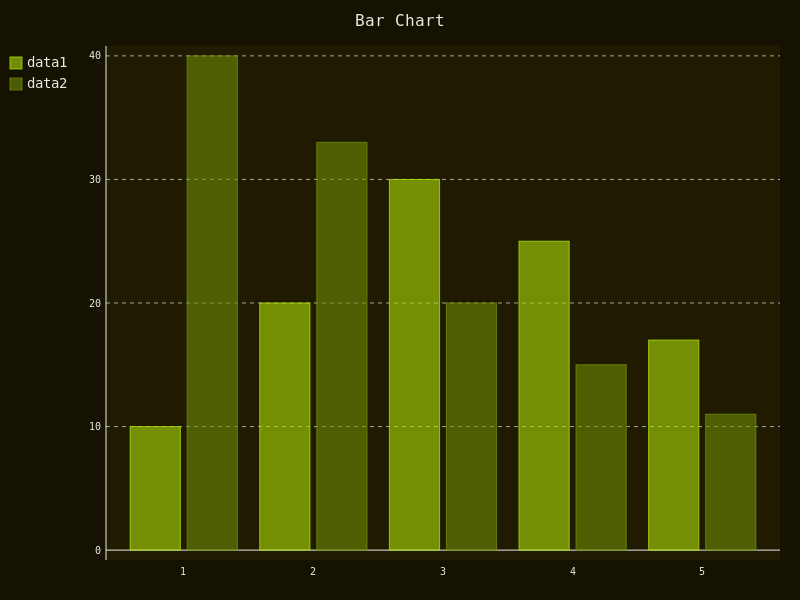

In [25]:
bar_chart = pygal.Bar(style=DarkGreenStyle)
bar_chart.title = "Bar Chart"
bar_chart.x_labels = [1,2,3,4,5]  #List
bar_chart.add("data1" , data1)
bar_chart.add("data2" , data2)
# Save the svg to a file
#bar_chart.render_to_file('bar_chart.svg')


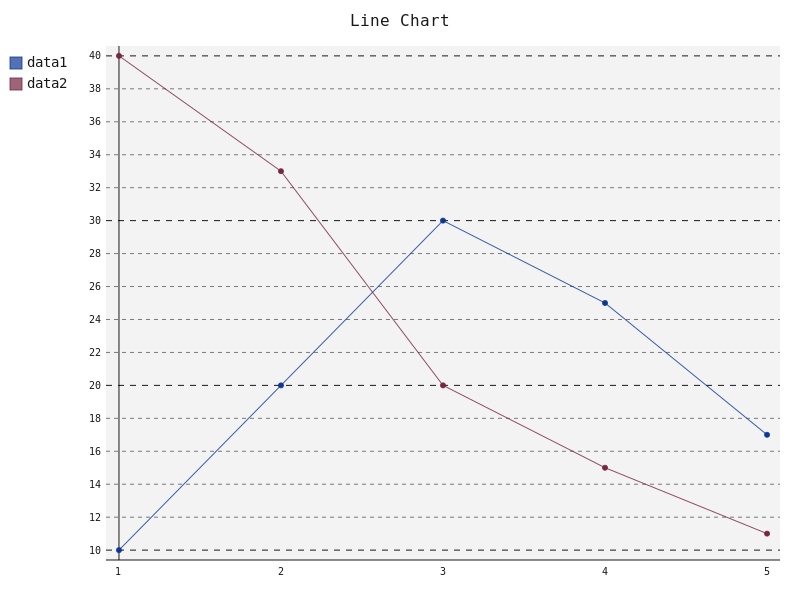

In [26]:
line_chart = pygal.Line(style=CleanStyle)
line_chart.title = "Line Chart"
line_chart.x_labels = [1,2,3,4,5]  #List
line_chart.add("data1" , data1)
line_chart.add("data2" , data2)
# Save the svg to a file
#line_chart.render_to_file('line_chart.svg')

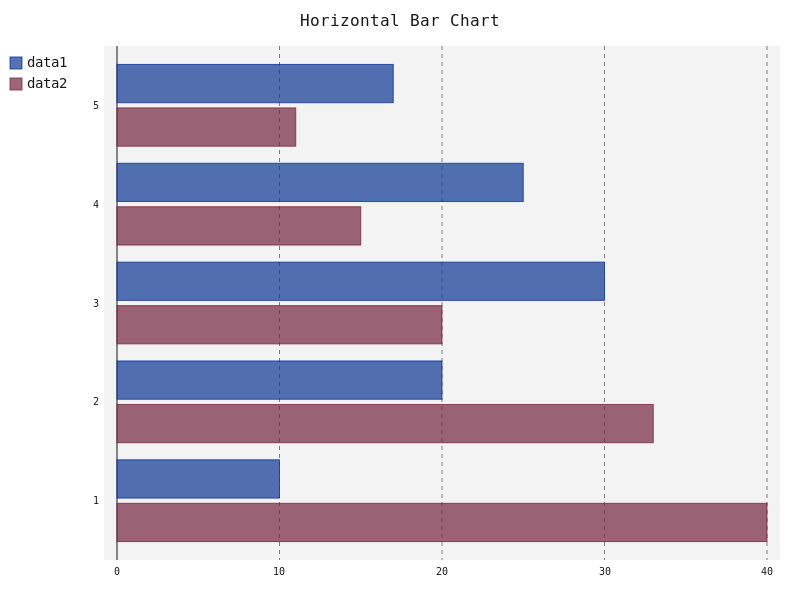

In [27]:
horizontal_chart = pygal.HorizontalBar(style=CleanStyle)
horizontal_chart.title = "Horizontal Bar Chart"
horizontal_chart.x_labels = [1,2,3,4,5]  #List
horizontal_chart.add("data1" , data1)
horizontal_chart.add("data2" , data2)
# Save the svg to a file
#horizontal_chart.render_to_file('horizontal_chart.svg')


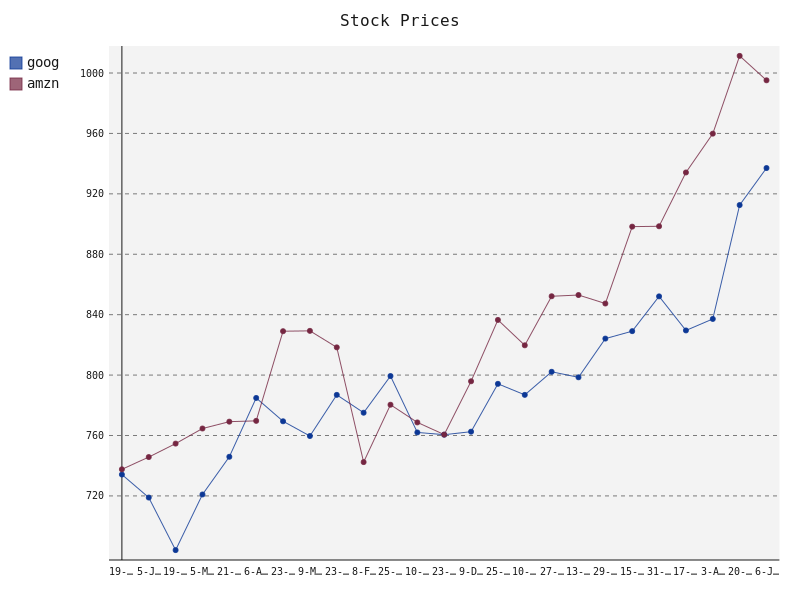

In [35]:
import csv
import pygal
from pygal.style import CleanStyle

stockPrices = {}  #key is symbol, value is list of closing prices
stockSymbols = ['goog','amzn']
for symbol in stockSymbols:
    fileName = "./datasets/" + symbol + ".csv"
    f = open(fileName, "r")
    reader = csv.reader(f)
    next(reader, None)  # skip the headers
    dataset = []
    dates = []
    count = 0
    #Date,Open,High,Low,Close,Volume
    for data in reader:
        count = count + 1
        if count%10 == 0:
            dates.append(data[0])
            dataset.append(float(data[4]))
    stockPrices[symbol] = list(reversed(dataset))
    
line_chart = pygal.Line(style=CleanStyle)
line_chart.title = "Stock Prices"
line_chart.x_labels = dates  #List
for symbol in stockSymbols:
    line_chart.add(symbol, stockPrices[symbol])
    
line_chart